<a href="https://colab.research.google.com/github/Robbie08/income-prediction/blob/Robert-O-patch1/Income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Income Predection Project

In [1]:
# load libraries
import pandas as pd # for linear algebra
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations

In [2]:
# Fetch dataset from GitHub
df = pd.read_csv('https://raw.githubusercontent.com/Robbie08/income-prediction/main/data-sets/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Data exploration, cleaning, and wrangling




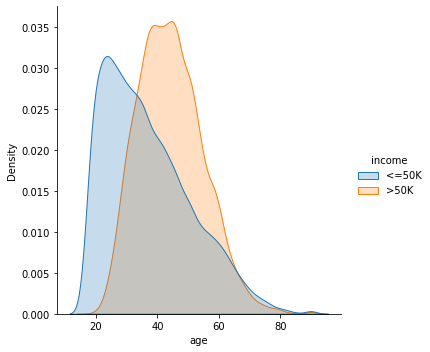

In [3]:
#explore 'age' 
sns.displot(df, x="age", hue="income", kind="kde", fill = True, common_norm=False) 
# median age of >50K group is higher 
# distribution for <=50K is not normally distributed (right-skewed)

In [4]:
#explore 'workclass'
df['workclass'].value_counts()   

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

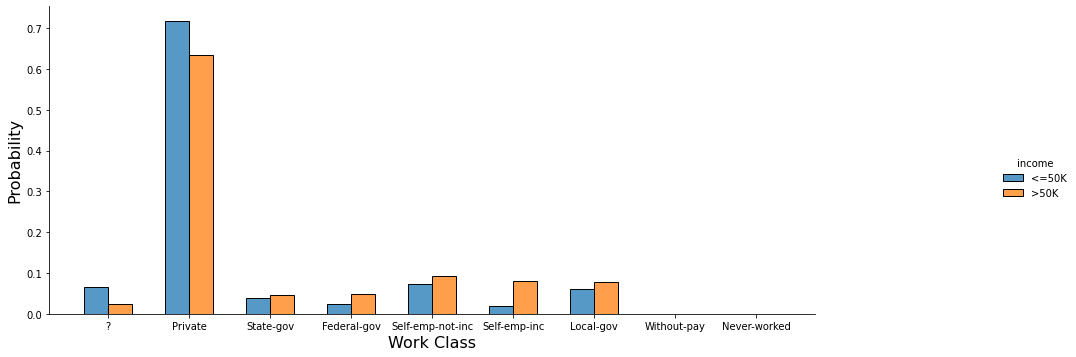

In [5]:
#explore 'workclass' 
workClass = sns.displot(df, x="workclass", shrink=0.6, hue="income", stat="probability", multiple="dodge", common_norm=False)
workClass.fig.set_size_inches(16,5)
plt.xlabel(xlabel='Work Class', fontdict={'fontsize':16})
plt.ylabel(ylabel='Probability',fontdict={'fontsize':16})
plt.show(workClass)

In [6]:
#combine Without-pay & Never-worked into "no-work" 
for i in range(0, df.shape[0]): 
  if df['workclass'][i] == 'Without-pay'or df['workclass'][i] == 'Never-worked':
    df['workclass'][i] = "No-work"
df['workclass'].value_counts() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
No-work                21
Name: workclass, dtype: int64

In [7]:
#get rid of rows with '?' 
df = df[df['workclass'] != '?']
df['workclass'].value_counts() 

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
No-work                21
Name: workclass, dtype: int64

In [8]:
#change 'workclass' into dummy variables 
dummy = pd.get_dummies(df['workclass'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop('workclass', axis=1)

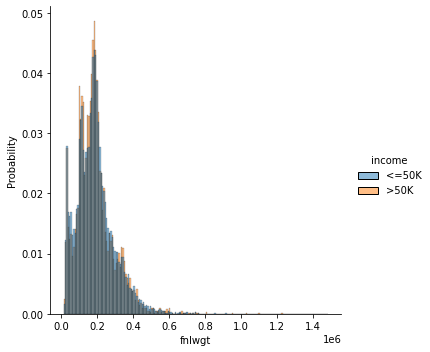

In [9]:
#compare distributions of 'fnlwgt' with respect to two guages of income: <=50K and >50K 
sns.displot(df, x="fnlwgt", hue="income", stat="probability", common_norm=False) #there is no significant difference 

In [10]:
#feature 'fnlwgt' does not affect income, thus drop the 'fnlwgt' column
df = df.drop('fnlwgt', axis=1)

In [11]:
#explore 'education.num'
df['education.num'].value_counts()  #would highly be correlated with 'education' 

9     9969
10    6777
13    5182
14    1675
11    1321
7     1057
12    1020
6      833
4      574
15     558
5      463
16     398
8      393
3      303
2      156
1       46
Name: education.num, dtype: int64

In [12]:
#thus, drop 'education.num'
df = df.drop('education.num', axis=1)

In [13]:
#explore 'marital.status' 
df['marital.status'].value_counts()

Married-civ-spouse       14340
Never-married             9917
Divorced                  4259
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: marital.status, dtype: int64

In [14]:

#change 'marital.status' into dummy variables 
dummy = pd.get_dummies(df['marital.status'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop('marital.status', axis=1)

In [15]:
##OCCUPATION 
#merging ? with "other-service"
df.loc[df['occupation'] == "?", 'occupation'] = 'Other-service'
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3302
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [16]:
#OCCUPATION DUMMY
dummy = pd.get_dummies(df['occupation'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop('occupation', axis=1)

In [17]:
#EDUCATION
#cleaning up / merging dataframe
df.loc[df['education'] == "12th", 'education'] = 'HS'
df.loc[df['education'] == "11th", 'education'] = 'HS'
df.loc[df['education'] == "10th", 'education'] = 'HS'
df.loc[df['education'] == "9th", 'education'] = 'HS'
df.loc[df['education'] == "7th-8th", 'education'] = 'Under HS'
df.loc[df['education'] == "5th-6th", 'education'] = 'Under HS'
df.loc[df['education'] == "1st-4th", 'education'] = 'Under HS'
df.loc[df['education'] == "Preschool", 'education'] = 'Under HS'
#many "under HS" don't reveal their occupation

df['education'].value_counts()

HS-grad         9969
Some-college    6777
Bachelors       5182
HS              2746
Masters         1675
Assoc-voc       1321
Under HS        1079
Assoc-acdm      1020
Prof-school      558
Doctorate        398
Name: education, dtype: int64

In [18]:
#EDUCATION dummy
dummy = pd.get_dummies(df['education'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop('education', axis=1)

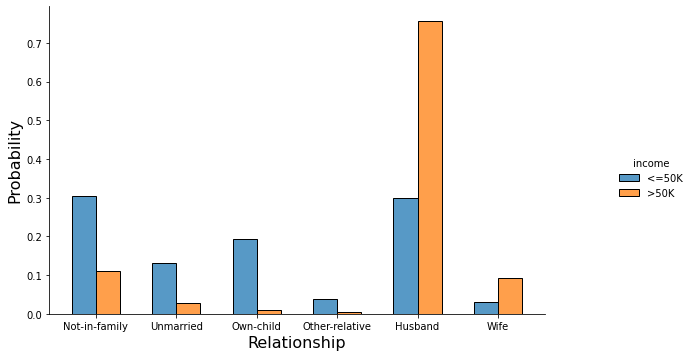

In [19]:
#explore 'relationship' ('what this individual is' to others)
df['relationship'].value_counts()

relationship_plt = sns.displot(df, x="relationship", shrink=.6, hue="income", stat="probability", multiple="dodge", common_norm=False)
relationship_plt.fig.set_size_inches(10,5)
plt.xlabel(xlabel='Relationship', fontdict={'fontsize':16})
plt.ylabel(ylabel='Probability',fontdict={'fontsize':16})
plt.show(relationship_plt)


In [20]:
# Since the graph shows that there is a correlation between
# income and relationship, we will not modify any values in the colum

dummy = pd.get_dummies(df['relationship'], drop_first = True)
df = pd.concat([df,dummy], axis = 1)
df = df.drop('relationship', axis = 1)

In [21]:
# RACE
#combining asian pacific islander and american indian/eskimo into the "other" column for clarity 
# -(also b/c the individual counts were really small, so this helps add weight)
df.loc[df['race'] == "Asian-Pac-Islander", 'race'] = 'Other'
df.loc[df['race'] == "Amer-Indian-Eskimo", 'race'] = 'Other'

In [22]:
#now we can display the numeric values for the races "white", "black" and "other"
dummy = pd.get_dummies(df['race'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop('race', axis=1)

In [23]:
# SEX
dummy = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop('sex', axis=1)

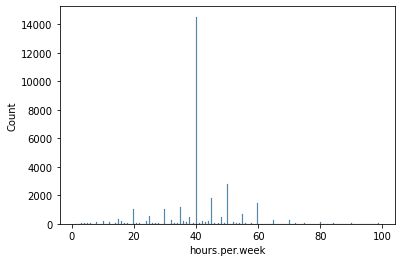

In [24]:
#explore 'hours.per.week'
df['hours.per.week'].value_counts()
sns.histplot(df, x="hours.per.week")

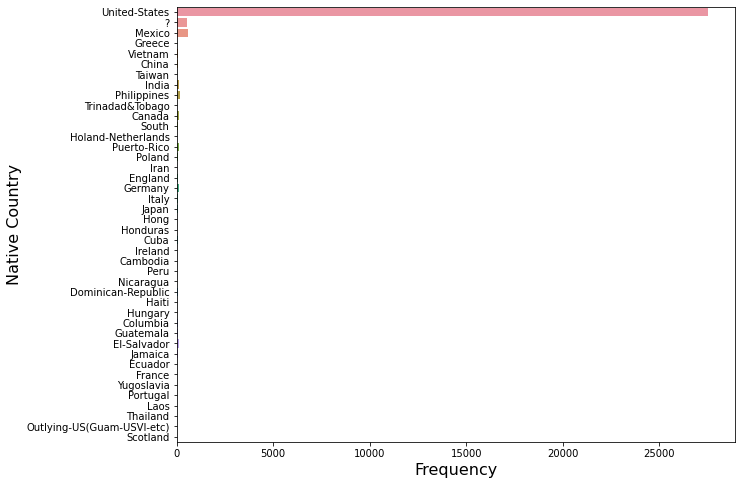

In [25]:
# Visualization to see what the distribution of countries looks like
plt.figure(figsize=(10,8))
native_country_plt = sns.countplot(y = 'native.country', data = df)
plt.xlabel(xlabel='Frequency', fontdict={'fontsize':16})
plt.ylabel(ylabel='Native Country',fontdict={'fontsize':16})
plt.show(native_country_plt)

In [26]:
# we should get rid of any values that are '?' since they are just considered noise
df = df[df['native.country'] != '?']

In [27]:
# since it seems that there are significantly more data values for the United-States
# category, I decided to modify the data to be categorized as US native or not US native

df.loc[df['native.country']  != 'United-States', 'native.country'] = 0
df.loc[df['native.country'] == 'United-States', 'native.country'] = 1

# must convert to int so that the heatmap doesn't complain
df['native.country'] = df['native.country'].astype(str).astype(int)
df['native.country'].value_counts()

1    27511
0     2658
Name: native.country, dtype: int64

In [28]:
# now lets change the row to is_us_native, so that it can be easier to read
df = df.rename(columns= {'native.country':'is_us_native'})

In [29]:
# Now we need to transform the income column to numeric data
df.loc[df['income']  == '>50K', 'income'] = 1
df.loc[df['income']  == '<=50K', 'income'] = 0

# change the name of the income column to something more appropriate
df = df.rename(columns= {'income':'above_50K'})

df['above_50K'] = df['above_50K'].astype(str).astype(int)

In [30]:
df.head()

,age,capital.gain,capital.loss,hours.per.week,is_us_native,above_50K,Local-gov,No-work,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Assoc-voc,Bachelors,Doctorate,HS,HS-grad,Masters,Prof-school,Some-college,Under HS,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Other,White,Male
1,82,0,4356,18,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,54,0,3900,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,41,0,3900,40,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
5,34,0,3770,45,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6,38,0,3770,40,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1


## More Exploratory Analysis


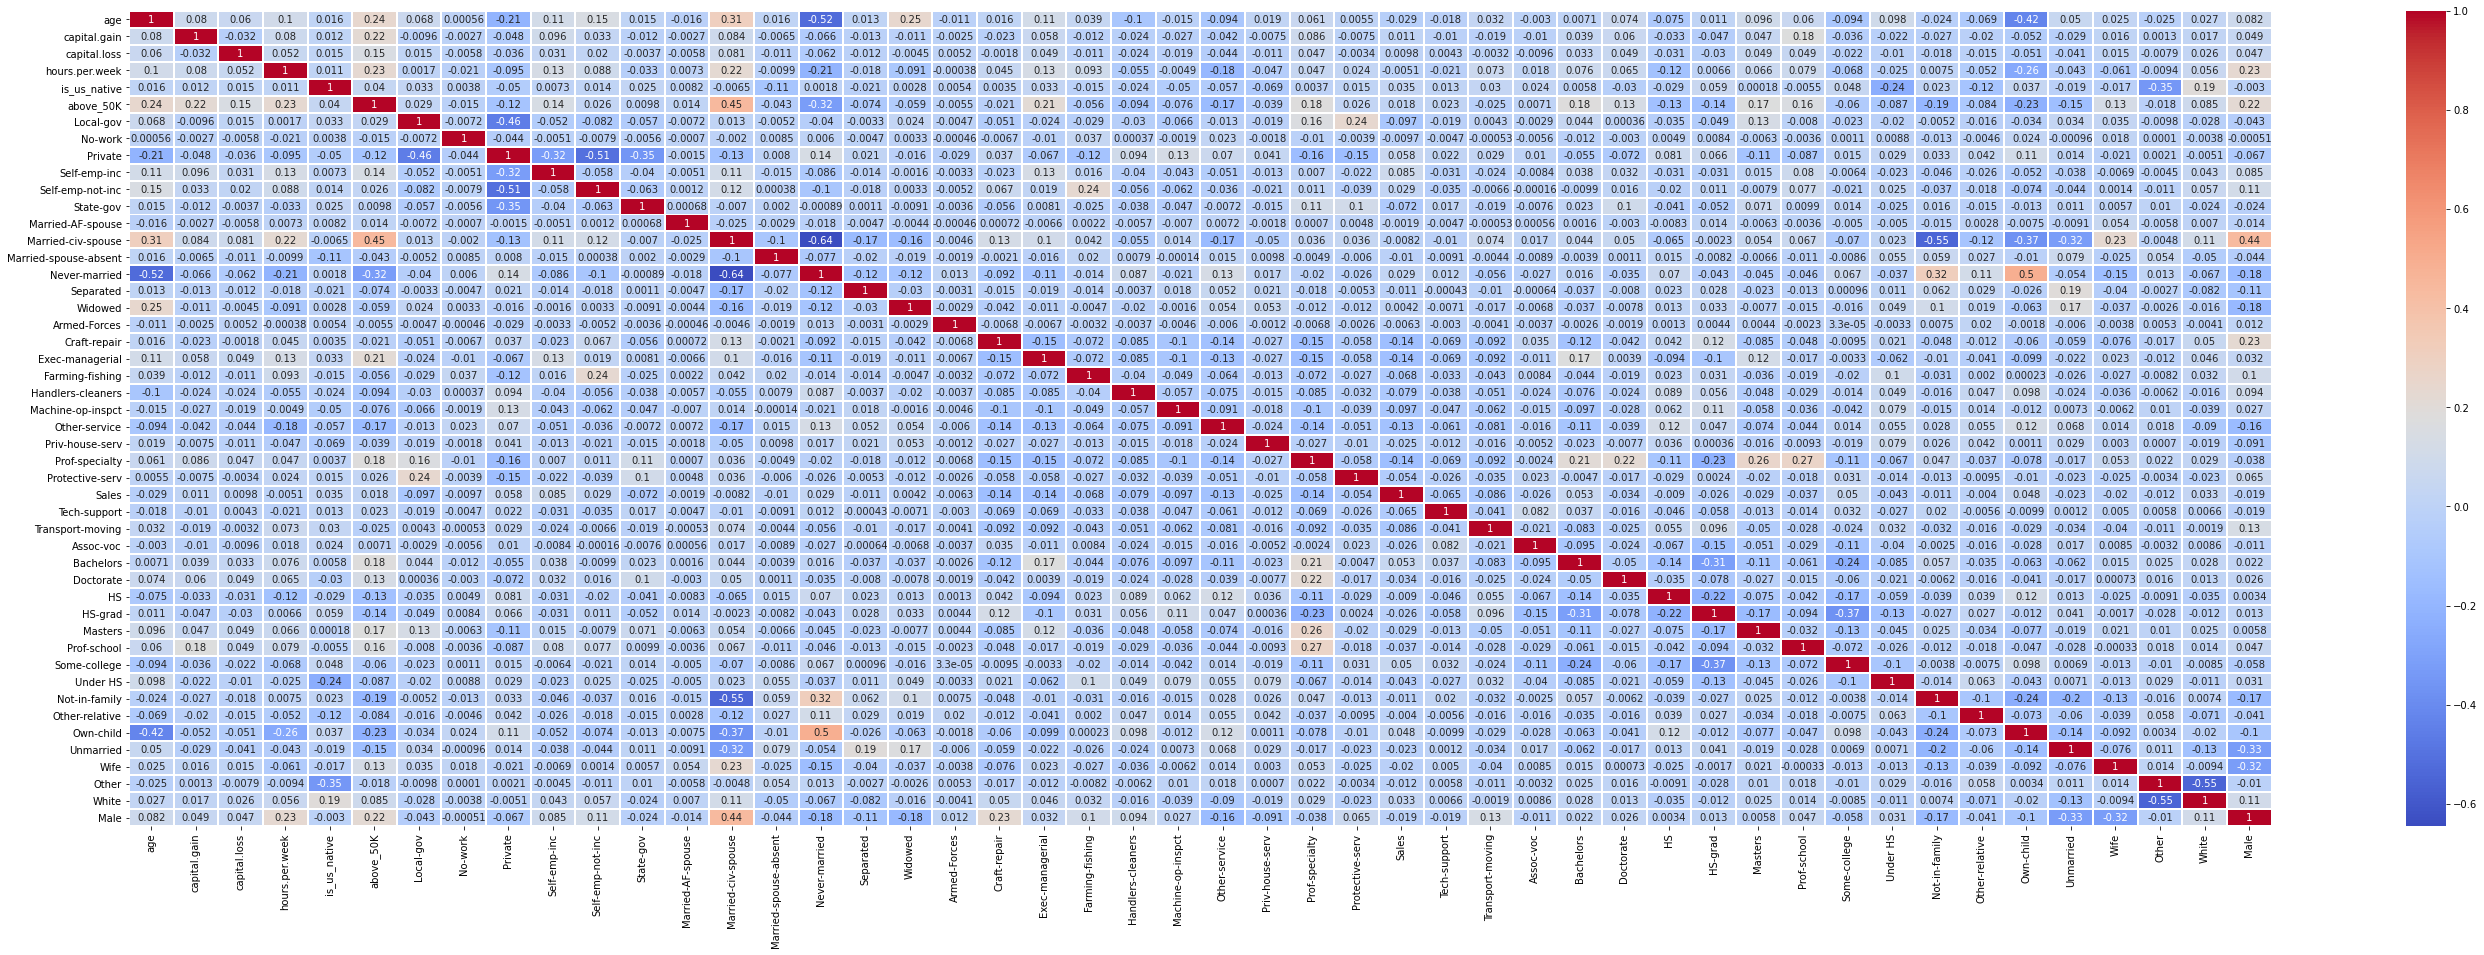

In [31]:
# We can use this heat map to see what features have a higher correlation
plt.figure(figsize=(48,15))
heat_map = sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=1)

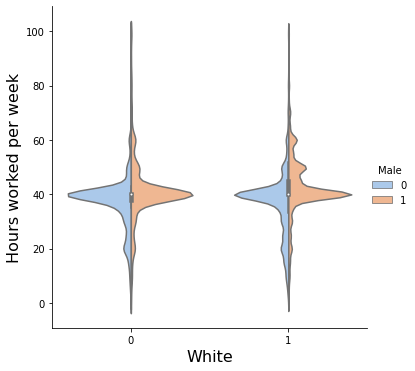

In [32]:
## Violin plot for visualizing relationship between hours.per.week and white for
## both men and women
hours_and_men_violinplt = sns.catplot(x="White", y="hours.per.week", hue="Male", kind="violin", split=True, palette="pastel", data=df)
plt.xlabel(xlabel='White', fontdict={'fontsize':16})
plt.ylabel(ylabel='Hours worked per week',fontdict={'fontsize':16})

plt.show(hours_and_men_violinplt)

## Data Split

In [33]:
#import library
from sklearn.model_selection import train_test_split

In [34]:
#dataframe for x variables
X_df = df.drop('above_50K', axis=1) 
X_df

,age,capital.gain,capital.loss,hours.per.week,is_us_native,Local-gov,No-work,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Assoc-voc,Bachelors,Doctorate,HS,HS-grad,Masters,Prof-school,Some-college,Under HS,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Other,White,Male
1,82,0,4356,18,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,54,0,3900,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,41,0,3900,40,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
5,34,0,3770,45,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6,38,0,3770,40,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,0,0,40,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1
32557,27,0,0,38,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
32558,40,0,0,40,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
32559,58,0,0,40,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [35]:
#splits to train set and test set 
#x_train, x_test, y_train, y_test = train_test_split(X_df, df.above_50K, test_size = 0.2, random_state = 123)

In [36]:
#K-fold cross validation 
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits = 10)

## Machine Learning and Classification Models

In [37]:
# import libraries for the classification models here
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [38]:
# Add models into a models list. Then perform the training on the list of models.
# We will also construct two lists of names and accuracy of the models in the
# models list

models = []
accuracy = []
names = []
models.append(('Random_Forest', RandomForestClassifier(n_estimators=250, random_state = 10)))
models.append(('NaiveBayes_Bernoulli', BernoulliNB(alpha=.01, binarize=.9)))
models.append(('NaiveBayes_Gaussian', GaussianNB(var_smoothing=1e-9)))
models.append(('NaiveBayes_Multinomial', MultinomialNB(alpha=.9)))
models.append(('KNNeighborsClassifier', KNeighborsClassifier(n_neighbors = 8)))
models.append(('Decision_Tree_Classifier', DecisionTreeClassifier(random_state=10)))
# models.append(('SupportVectorMachine', SVC(random_state = 123)))

# save model's names and thier accuracy in lists. This will help with adding
# adding them to a datframe.
for name , model in models:
  scores = cross_val_score(model, X_df, df.above_50K, cv = kfold, scoring = 'accuracy')
  accuracy.append(scores.mean()) 
  names.append(name)

In [39]:
## Save our model names and accuracy's into a data frame
models_dict = {'model':names, 'accuracy':accuracy}
df_models = pd.DataFrame(data=models_dict)
df_models

,model,accuracy
0,Random_Forest,0.816037
1,NaiveBayes_Bernoulli,0.797408
2,NaiveBayes_Gaussian,0.831450
3,NaiveBayes_Multinomial,0.734498
4,KNNeighborsClassifier,0.825185
5,Decision_Tree_Classifier,0.786967
